In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from skimage.transform import resize

import requests
from tqdm.notebook import tqdm, trange

import numpy as np

import torch
import torch.nn as nn

In [6]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            # conv layer 1
            nn.Conv2d(1, 32, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),

            # conv layer 2
            nn.Conv2d(32, 64, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),

            # fc layer 1
            nn.Flatten(),
            nn.Linear(7*7*64, 256),
            nn.ReLU(),

            # fc layer 2
            nn.Linear(256, 10)
        )

    def forward(self, x):
        return self.layers(x)

In [19]:
train_dataset = h5py.File('./datasets/cats/train_catvnoncat.h5', "r")
train_set_x_orig = torch.tensor(train_dataset["train_set_x"][:]) # your train set features
train_set_y_orig = torch.tensor(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File('./datasets/cats/test_catvnoncat.h5', "r")
test_set_x_orig = torch.tensor(test_dataset["test_set_x"][:]) # your test set features
test_set_y_orig = torch.tensor(test_dataset["test_set_y"][:]) # your test set labels

classes = np.array(test_dataset["list_classes"][:]) # the list of classes

train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

y = [1], it's a 'cat' picture.


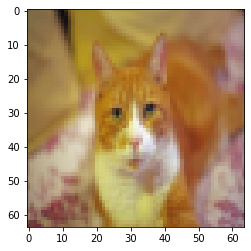

In [4]:
# an example of training data
index = 24
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y_orig[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y_orig[:, index])].decode("utf-8") +  "' picture.")

In [21]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

optimizer.zero_grad()
loss = criterion(model(train_set_x_orig), train_set_y_orig)
loss.backward()
optimizer.step()

RuntimeError: Given groups=1, weight of size [32, 1, 5, 5], expected input[209, 64, 64, 3] to have 1 channels, but got 64 channels instead

In [5]:
# Preprocess
m_train = train_set_x_orig.shape[0] # # training instances
m_test = test_set_x_orig.shape[0] # # test examples
num_px = train_set_x_orig.shape[1] # size of image

# Flatten images to 1D vector
train_set_x_flatten = train_set_x_orig.reshape(-1, num_px*num_px*3).T
test_set_x_flatten = test_set_x_orig.reshape(-1, num_px*num_px*3).T

# Standardize intege [0,255] to real [0,1]
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [3]:
# Call logistic regression for training
myclassifier = logrg()
costs = myclassifier.training(train_set_x, train_set_y, num_iter = 2000, learning_rate = 0.005)

100%|██████████| 2000/2000 [00:04<00:00, 490.97it/s]


In [ ]:
# How cost function evolves during training
plt.plot(costs)
plt.show()

In [4]:
percentage = lambda X, Y: 1-np.mean(np.abs(myclassifier.predict(X) - Y))
print(f'Training accuracy: {percentage(train_set_x, train_set_y)}')
print(f'Test accuracy: {percentage(test_set_x, test_set_y)}')

Training accuracy: 0.9904306220095693
Test accuracy: 0.7


In [ ]:
# Test against online imgaes
def get_image(url):
    im = Image.open(requests.get(url, stream=True).raw)
    plt.imshow(im)
    image = np.array(im)/255
    return resize(image, (num_px, num_px)).reshape(-1, num_px*num_px*3).T

image1 = get_image('https://github.com/knazeri/coursera/blob/master/deep-learning/1-neural-networks-and-deep-learning/2-logistic-regression-as-a-neural-network/images/cat_in_iran.jpg?raw=true')

In [ ]:
image2 = get_image('https://github.com/knazeri/coursera/blob/master/deep-learning/1-neural-networks-and-deep-learning/2-logistic-regression-as-a-neural-network/images/my_image.jpg?raw=true')

In [ ]:
# The first image is Ture
# The second image is False
myclassifier.predict([image1, image2])